In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the threshold activation function
def threshold_activation(x):
    return 1 if x >= 0 else 0

# Define the perceptron training function
def train_perceptron(X, y, learning_rate, num_epochs):
    num_samples, num_features = X.shape
    weights = np.random.uniform(-0.3, 0.3, size=num_features)
    accuracies = []

    for epoch in range(num_epochs):
        correct = 0
        for i in range(num_samples):
            input_data = X[i]
            target = y[i]
            net = np.dot(input_data, weights)
            prediction = threshold_activation(net)
            if prediction == target:
                correct += 1
            error = target - prediction
            weights += learning_rate * error * input_data

        accuracy = correct / num_samples
        accuracies.append(accuracy)

    return accuracies


Training for learning rate: 0.1
Accuracy history : [0.0, 0.5, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75]
Training for learning rate: 0.2
Accuracy history : [0.5, 0.5, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75]
Training for learning rate: 0.3
Accuracy history : [0.5, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75]
Training for learning rate: 0.4
Accuracy history : [0.5, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75]
Training for learning rate: 0.5
Accuracy history : [0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75]


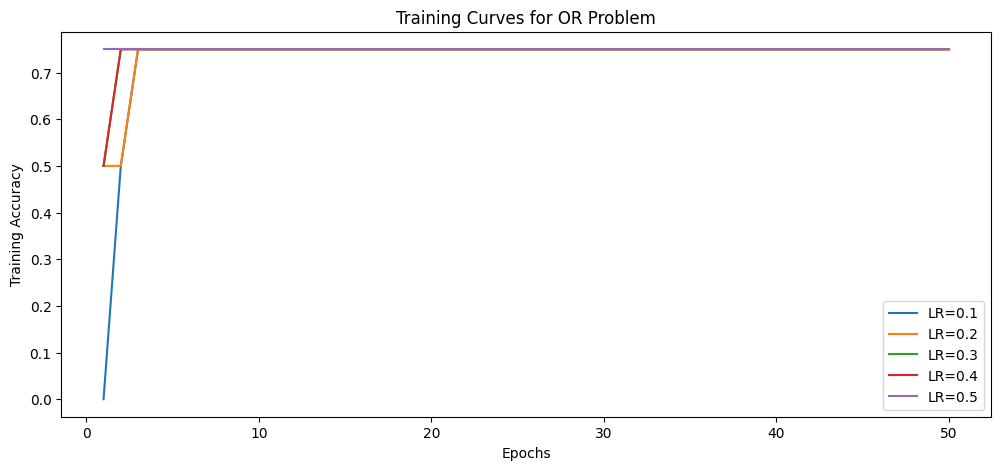

In [2]:

# OR problem
X_or = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_or = np.array([0, 1, 1, 1])

learning_rates = [0.1, 0.2, 0.3, 0.4, 0.5]
num_epochs = 50

plt.figure(figsize=(12, 5))
plt.title('Training Curves for OR Problem')
for lr in learning_rates:
    accuracies = train_perceptron(X_or, y_or, lr, num_epochs)
    print(f"Training for learning rate: {lr}")
    print(f"Accuracy history : {accuracies[:10]}")
    plt.plot(range(1, num_epochs + 1), accuracies, label=f'LR={lr}')

plt.xlabel('Epochs')
plt.ylabel('Training Accuracy')
plt.legend()
plt.show()


Training for learning rate: 0.1
Accuracy history : [0.25, 0.25, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Training for learning rate: 0.2
Accuracy history : [0.25, 0.25, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Training for learning rate: 0.3
Accuracy history : [0.25, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Training for learning rate: 0.4
Accuracy history : [0.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Training for learning rate: 0.5
Accuracy history : [0.25, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


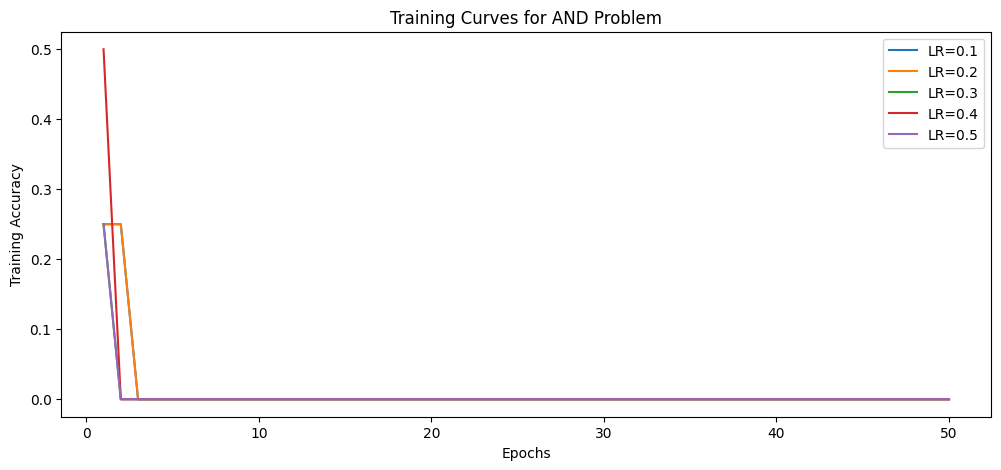

In [3]:

# AND problem
X_and = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_and = np.array([0, 0, 0, 1])

plt.figure(figsize=(12, 5))
plt.title('Training Curves for AND Problem')
for lr in learning_rates:
    print(f"Training for learning rate: {lr}")
    accuracies = train_perceptron(X_and, y_and, lr, num_epochs)
    print(f"Accuracy history : {accuracies[:10]}")
    plt.plot(range(1, num_epochs + 1), accuracies, label=f'LR={lr}')

plt.xlabel('Epochs')
plt.ylabel('Training Accuracy')
plt.legend()
plt.show()


In [8]:
import numpy as np

# Generate random data
np.random.seed(0)
X = np.random.rand(1000, 5)  # 1000 samples with 5 features
y = np.random.randint(2, size=1000)  # 2 classes

# Define the neural network architecture
input_size = 5
hidden_size = 10
output_size = 2
learning_rate = 0.1
epochs = 1000

# Initialize weights and biases
weights_input_hidden = np.random.rand(input_size, hidden_size)
bias_hidden = np.zeros((1, hidden_size))
weights_hidden_output = np.random.rand(hidden_size, output_size)
bias_output = np.zeros((1, output_size))

# Define the activation function (e.g., sigmoid)
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Define the derivative of the sigmoid function
def sigmoid_derivative(x):
    return x * (1 - x)

# Training the neural network
for epoch in range(epochs):
    # Forward propagation
    hidden_input = np.dot(X, weights_input_hidden) + bias_hidden
    hidden_output = sigmoid(hidden_input)
    output_input = np.dot(hidden_output, weights_hidden_output) + bias_output
    predicted_output = sigmoid(output_input)

    # Calculate the error
    error = y.reshape(-1, 1) - predicted_output

    # Backpropagation
    d_output = error * sigmoid_derivative(predicted_output)
    error_hidden = d_output.dot(weights_hidden_output.T)
    d_hidden = error_hidden * sigmoid_derivative(hidden_output)

    # Update weights and biases
    weights_hidden_output += hidden_output.T.dot(d_output) * learning_rate
    bias_output += np.sum(d_output, axis=0, keepdims=True) * learning_rate
    weights_input_hidden += X.T.dot(d_hidden) * learning_rate
    bias_hidden += np.sum(d_hidden, axis=0, keepdims=True) * learning_rate

# Predicting the class labels
predicted_labels = np.argmax(predicted_output, axis=1)

# Evaluate the accuracy
accuracy = np.mean(predicted_labels == y)
print(f"Accuracy: {accuracy * 100}%")


# Calculate the cross-entropy loss
loss = -np.mean(y * np.log(predicted_output[:, 1]) + (1 - y) * np.log(1 - predicted_output[:, 1]))

# Print the loss
print(f"Cross-Entropy Loss: {loss}")




Accuracy: 49.0%
Cross-Entropy Loss: 10.746371722618084
